In [ ]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

## Binarize Image

In [ ]:
!pip install imageio

from PIL import Image
import numpy
import imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def binarize_image(img_path, target_path, threshold):
    """Binarize an image."""
    image_file = Image.open(img_path)
    image = image_file.convert('L')  # convert image to monochrome
    image = numpy.array(image)
    image = binarize_array(image, threshold)
    imageio.imwrite("line_raw_binarize.jpg", image)


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    for i in range(len(numpy_array)):
        for j in range(len(numpy_array[0])):
            if numpy_array[i][j] > threshold:
                numpy_array[i][j] = 255
            else:
                numpy_array[i][j] = 0
    return numpy_array

binarize_image("/content/assamese_lines.png" , "path", 100)

## Line Segmentation

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 236, 237, 238, 239, 240, 241, 242, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 517, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 

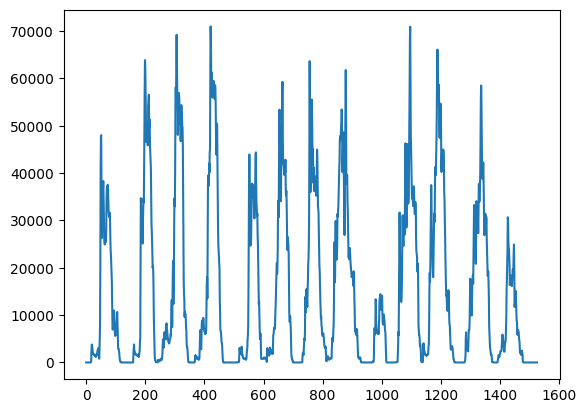

In [ ]:
img = cv2.imread("line_raw_binarize.jpg", 0)
img = 255-img

img_row_sum = np.sum(img,axis=1).tolist()

min = list()

for index, pixelvalue in enumerate(img_row_sum):
  if pixelvalue >= 0 and pixelvalue <= 100:
    min.append(index)


plt.plot(img_row_sum)
plt.show()

### Checking the Row Sum Array using Local Minima


(1526, 1290, 3)


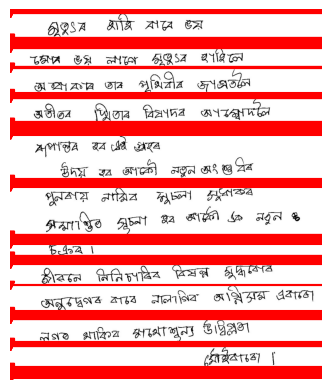

In [ ]:
from scipy.signal import argrelextrema

img_data = cv2.imread('line_raw_binarize.jpg')

print(img_data.shape)


for index, value in enumerate(min):
  x = [0, 500000]
  y = [value, value]
  plt.plot(x, y, marker='v', color='red')

plt.axis('off')
plt.imshow(img_data)


# Line segmentation without local minima

(1526, 1290, 3)


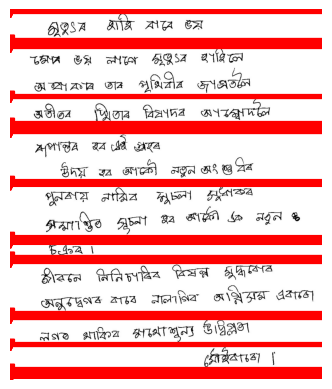

In [ ]:
img_data = cv2.imread('line_raw_binarize.jpg')

print(img_data.shape)

for index, value in enumerate(img_row_sum):
  if value == 0:
    x = [0, 500000]
    y = [index, index]
    plt.plot(x, y, marker='v', color='red')


plt.axis('off')
plt.imshow(img_data)

## Word Segmentation


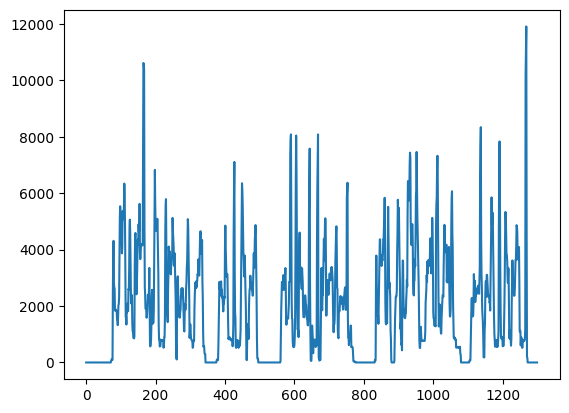

In [ ]:


img = cv2.imread("line_raw_binarize.jpg", 0)
img = 255-img

img_col_sum = np.sum(img,axis=0).tolist()

plt.plot(img_col_sum)
plt.show()

## Checking Col Sum Array

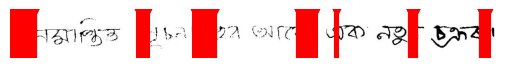

In [ ]:
img_data = cv2.imread('line_raw_binarize.jpg')

# print(img_data.shape)

# print(len(img_col_sum))

for index, value in enumerate(img_col_sum):
   # print("Index:" + str(index) + "\nValue: " + str(value))
  if value == 0:
    x = [index, index]
    y = [0, 50000]
    plt.plot(x, y, marker='v', color='red')

plt.axis('off')
plt.imshow(img_data)